### Regression Exercise 
# Moneyball The NBA

##### Import Our Libraries

In [2]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

import CTPLIB as ctp


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [9]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/NBA_train.csv')
df2 = pd.read_csv('data/NBA_test.csv')


# DISPLAY THE FIRST 5 ROWS
df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season. 
PTS: Points scored in regular season. 
oppPTS: Opponent Points scored in regular season. 
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals 
BLK: Blocks 
TOV: Turnovers 
```

#### Inspect our data using `df.describe()` function.

In [4]:
# Inspect our data using `df.describe()` function.
df.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


In [10]:
df2.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2013.0,0.500000,40.678571,8061.821429,8072.821429,3051.285714,6736.607143,2460.214286,5090.964286,591.071429,1645.642857,1368.178571,1818.571429,919.964286,2532.678571,1818.821429,640.392857,419.428571,1191.392857
std,0.0,0.509175,13.078265,338.940840,282.198256,108.952201,170.394605,133.085703,347.353858,118.700347,284.668776,167.057332,219.899881,107.620899,120.902487,118.686345,67.871523,73.159100,67.380258
min,2013.0,0.000000,20.000000,7640.000000,7319.000000,2823.000000,6348.000000,2105.000000,4318.000000,382.000000,1107.000000,1004.000000,1359.000000,666.000000,2359.000000,1579.000000,520.000000,294.000000,988.000000
25%,2013.0,0.000000,29.000000,7763.000000,7898.500000,2975.250000,6643.000000,2374.750000,4844.750000,511.500000,1469.250000,1297.750000,1695.000000,882.250000,2451.750000,1736.750000,590.250000,366.500000,1152.000000
50%,2013.0,0.500000,42.000000,8013.500000,8068.500000,3052.500000,6695.500000,2474.000000,5203.000000,584.500000,1608.000000,1357.000000,1786.000000,927.500000,2482.500000,1840.500000,653.500000,408.500000,1201.000000
75%,2013.0,1.000000,50.250000,8293.750000,8288.000000,3126.500000,6892.750000,2539.500000,5335.500000,659.250000,1761.000000,1439.750000,1905.500000,989.500000,2622.000000,1887.000000,686.250000,448.000000,1233.000000
max,2013.0,1.000000,66.000000,8704.000000,8619.000000,3339.000000,7197.000000,2818.000000,5572.000000,891.000000,2371.000000,1819.000000,2289.000000,1092.000000,2801.000000,2058.000000,784.000000,624.000000,1348.000000


#### Check for Nulls.

In [6]:
# Check for Nulls.
df.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

In [11]:
df2.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

#### Check for Duplicates

In [7]:
# Check for Duplicates
df.duplicated().sum()

0

In [12]:
df2.duplicated().sum()

0

#### Build a function that will INSPECT ANY DATAFRAME FOR YOU do this for you for any data frame you pass into it.

In [23]:
def inspect_dataframe(input_df):
    head_info = "Dataframe Head:\n\n" + str(input_df.head()) + "\n\n\n"
    describe_info = "Dataframe Describe:\n\n" + str(input_df.describe()) + "\n\n\n"
    nulls_info = "Dataframe nulls:\n\n" + str(input_df.isnull().sum()) + "\n\n\n"
    duplicates_info = "Dataframe Duplicates:\n\n" + str(input_df.duplicated().sum()) + "\n\n\n"
    
    return head_info + describe_info + nulls_info + duplicates_info

result = inspect_dataframe(df)
print(result)

Dataframe Head:

   SeasonEnd                 Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0       1980        Atlanta Hawks         1  50  8573    8334  3261  7027   
1       1980       Boston Celtics         1  61  9303    8664  3617  7387   
2       1980        Chicago Bulls         0  30  8813    9035  3362  6943   
3       1980  Cleveland Cavaliers         0  37  9360    9332  3811  8041   
4       1980       Denver Nuggets         0  30  8878    9240  3462  7470   

     2P   2PA   3P  3PA    FT   FTA   ORB   DRB   AST  STL  BLK   TOV  
0  3248  6952   13   75  2038  2645  1369  2406  1913  782  539  1495  
1  3455  6965  162  422  1907  2449  1227  2457  2198  809  308  1539  
2  3292  6668   70  275  2019  2592  1115  2465  2152  704  392  1684  
3  3775  7854   36  187  1702  2205  1307  2381  2108  764  342  1370  
4  3379  7215   83  255  1871  2539  1311  2524  2079  746  404  1533  


Dataframe Describe:

         SeasonEnd    Playoffs           W           PTS        o

#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

Text(0.5, 1.0, 'NBA Teams: Wins vs. Team (Playoff Status)')

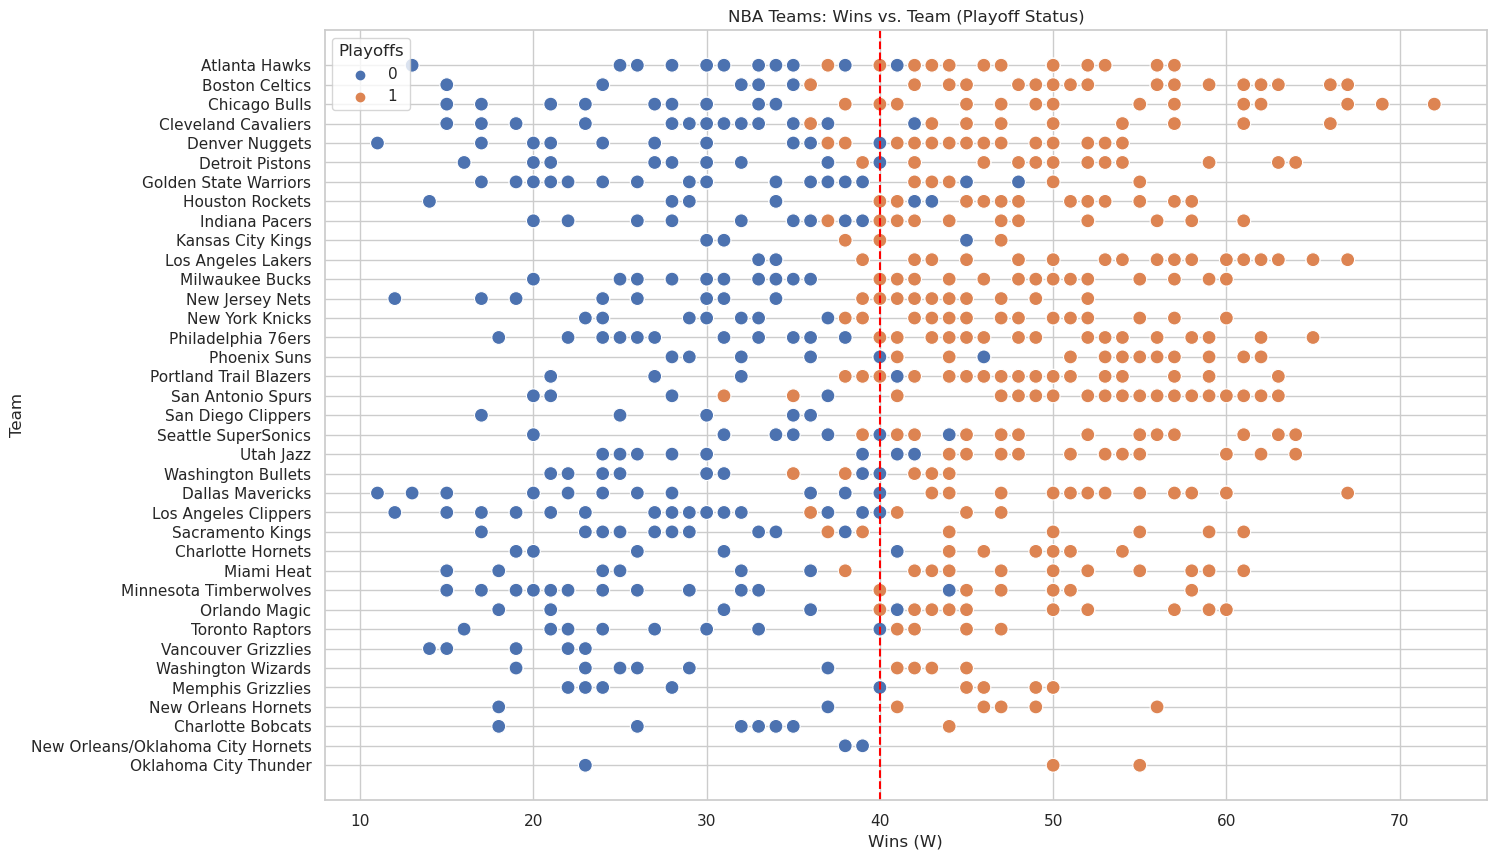

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(data=df, x='W', y='Team', hue='Playoffs', marker='o', s=100)
ax.axvline(x=40, color='red', linestyle='--')
plt.xlabel('Wins (W)')
plt.ylabel('Team')
plt.title('NBA Teams: Wins vs. Team (Playoff Status)')

#### Take a rough estimate, and now use that moving forward.  



In [90]:
WINS_NEED_TO_MAKE_PLAYOFFS = 40

---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

# Rough Guide a v1 model.
0. Make a model to predict PTS 
0. For v1, dont use `2P, 3P, FG, or FT`.  Instead use `2PA, 3PA, FTA`.  
0. Include any other cols use see fit.  


<Axes: xlabel='scored_diff', ylabel='W'>

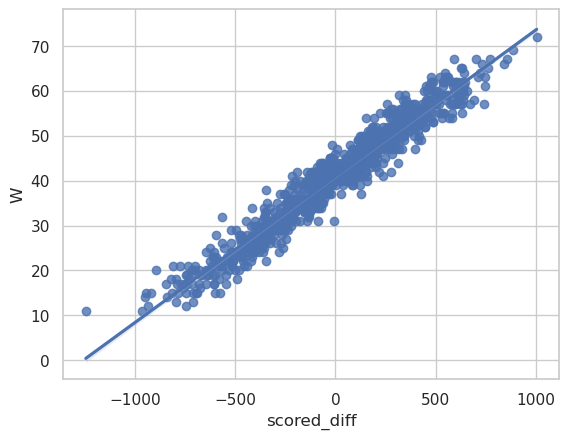

In [42]:
df['scored_diff'] = df['PTS'] - df['oppPTS']
sns.regplot(df, x='scored_diff', y='W')

In [43]:
independent_variables = 'scored_diff'
dependent_variable = 'W'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)

model_wins = sm.OLS(y, X).fit()
y_pred = model_wins.predict(X) 

results = model_wins.summary()
print(results)

model_wins_root_mean_squared_error = rmse(y, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', model_wins_root_mean_squared_error)
try:
    print( 'RMSEs Percentage off average:', ((model_wins_root_mean_squared_error / y.mean())*100).round(2))
except:
    pass

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:26:46   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          41.0000      0.106    387.027      

In [53]:
coef_y_int = model_wins.params['const']
coef_runs_diff = model_wins.params['scored_diff']

print(coef_y_int, coef_runs_diff)

WINS = 55

min_scored_diff = (WINS - coef_y_int) / coef_runs_diff
min_scored_diff

41.00000000000002 0.032586332821132956


429.62796939582813

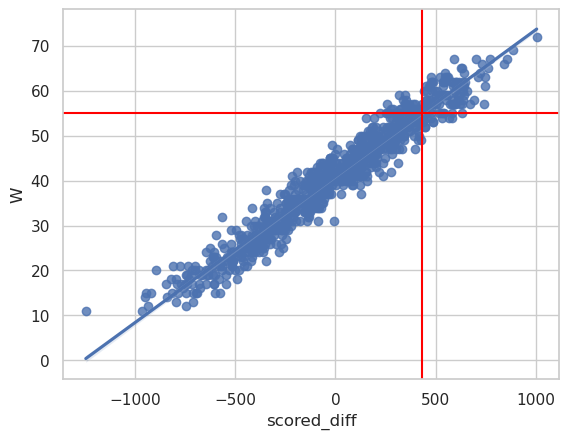

In [54]:
ax = sns.regplot(df, x='scored_diff', y='W' )
ax.axvline(x=min_scored_diff, color='red')
ax.axhline(y=WINS, color='red')

['SeasonEnd', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'scored_diff']


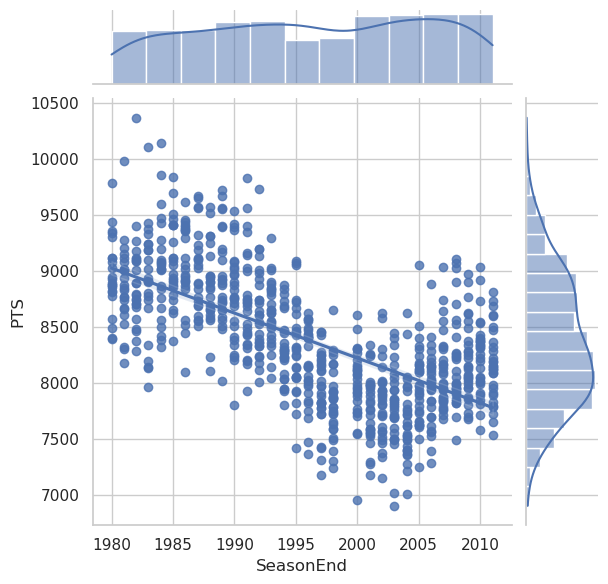

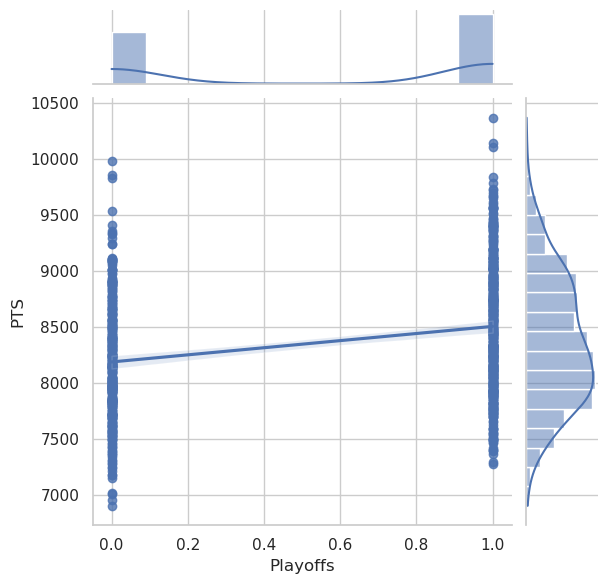

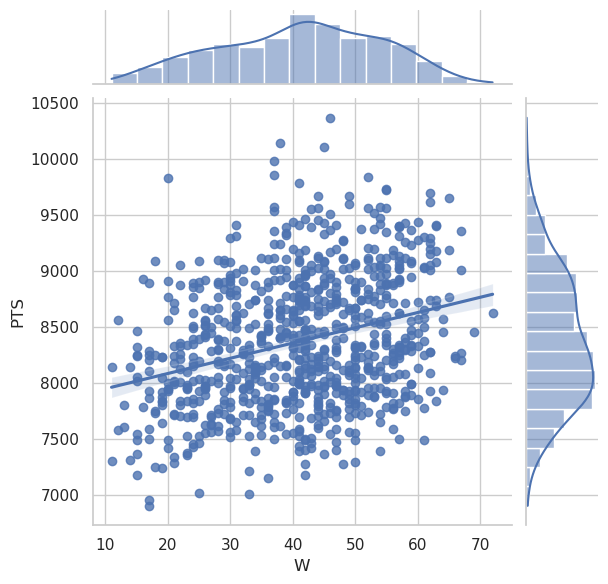

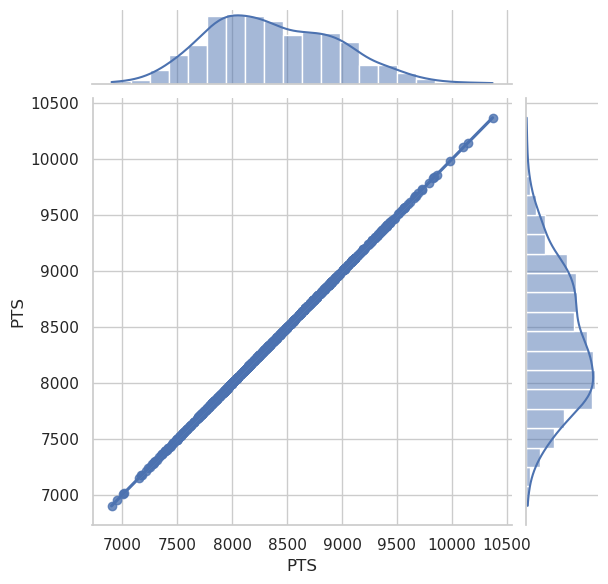

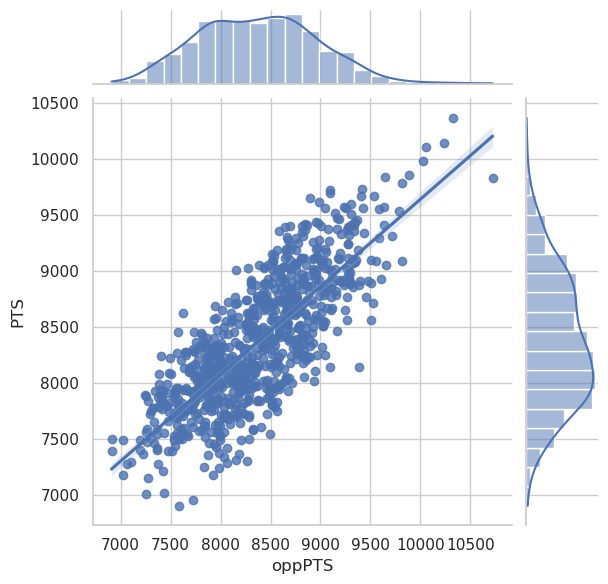

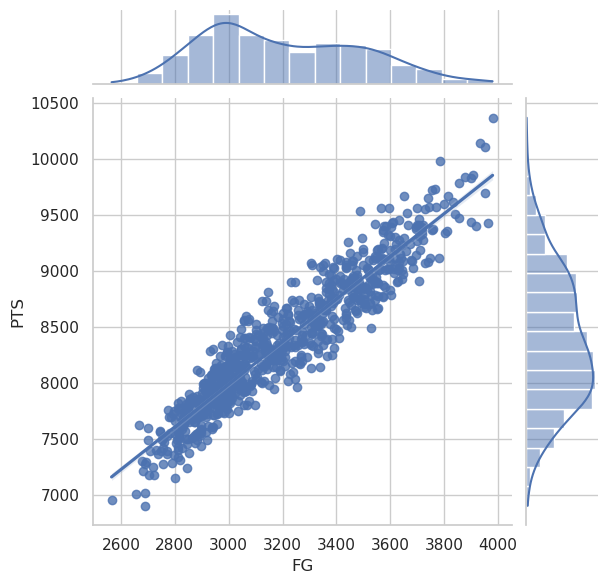

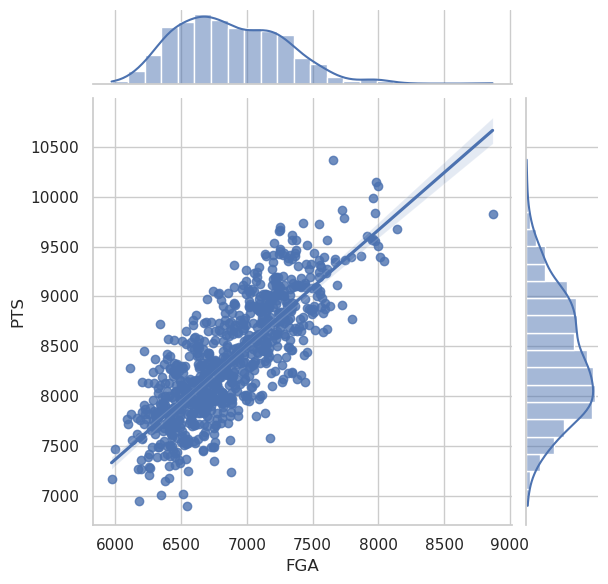

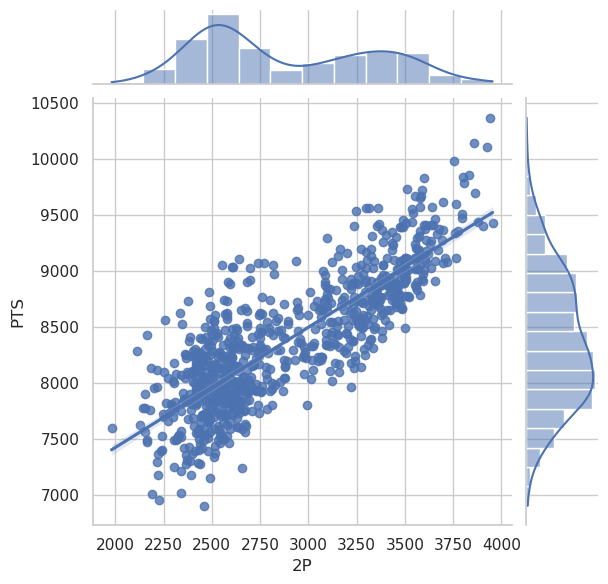

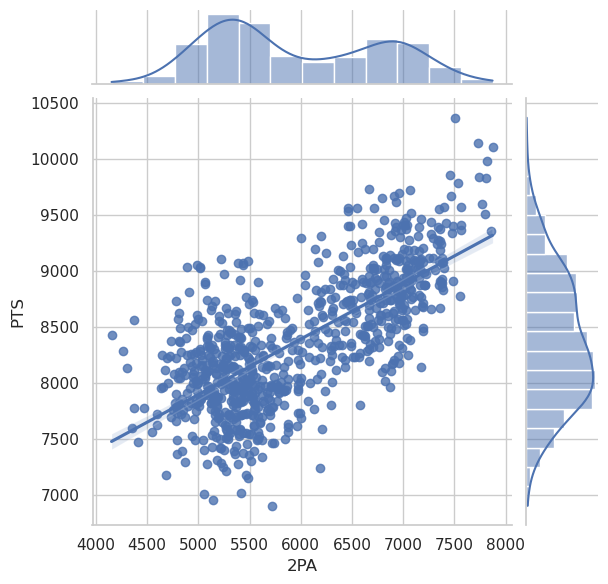

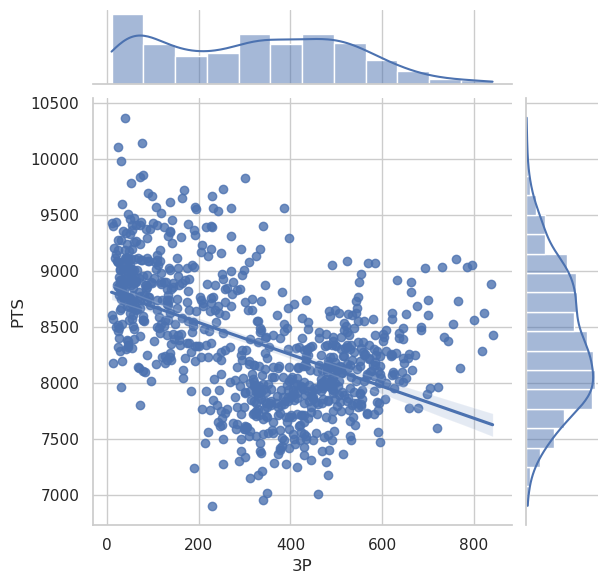

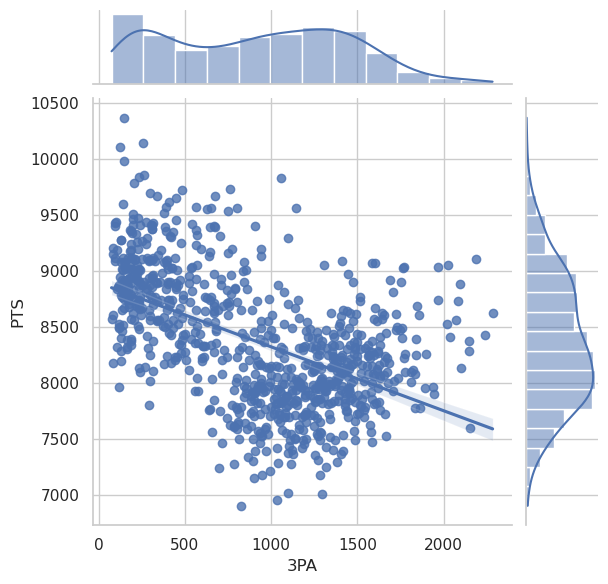

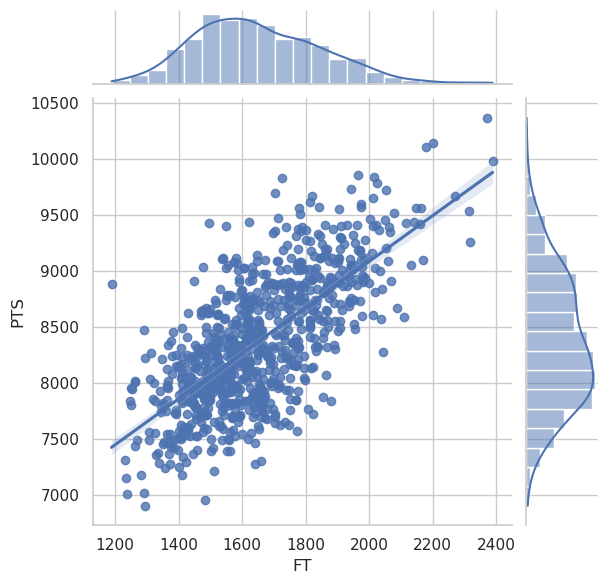

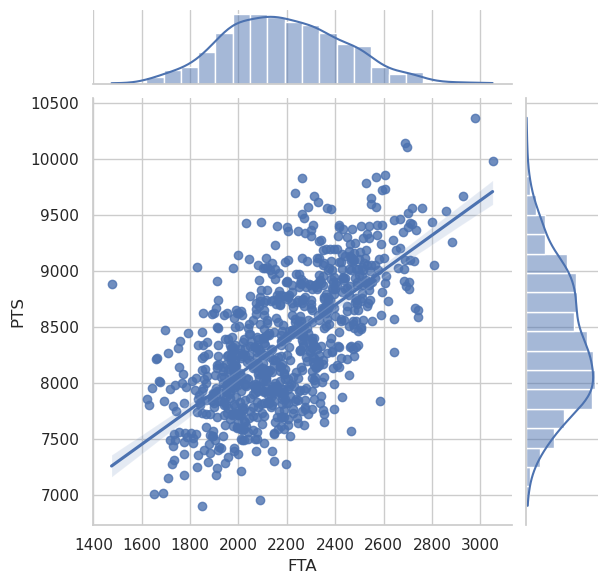

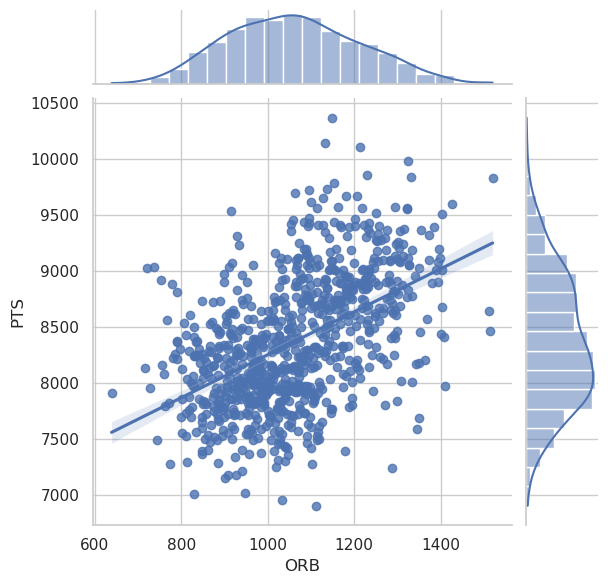

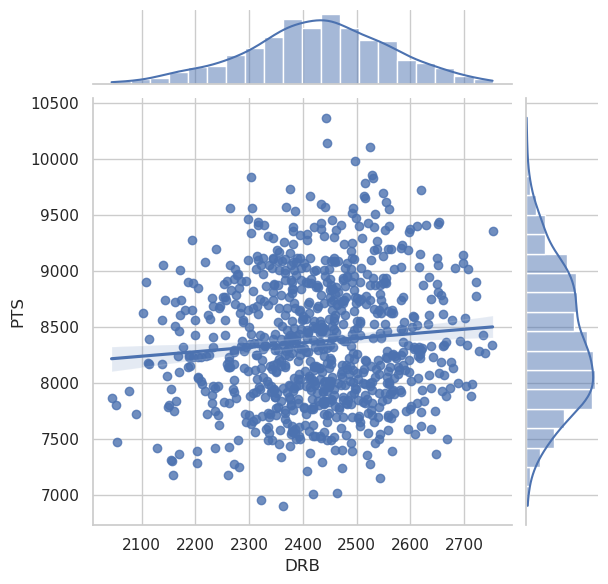

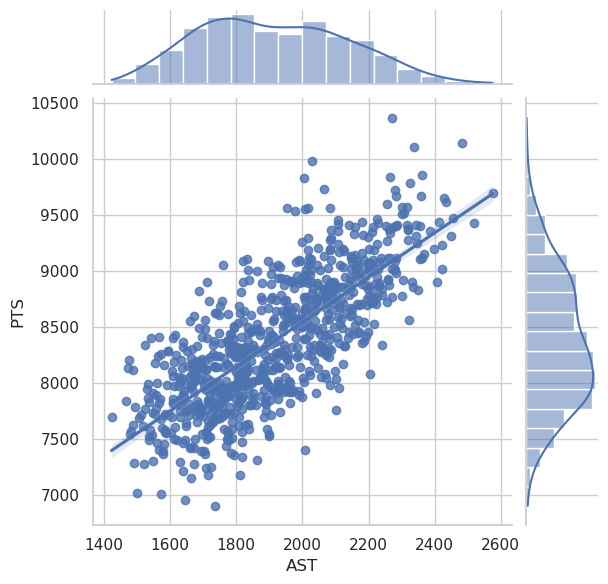

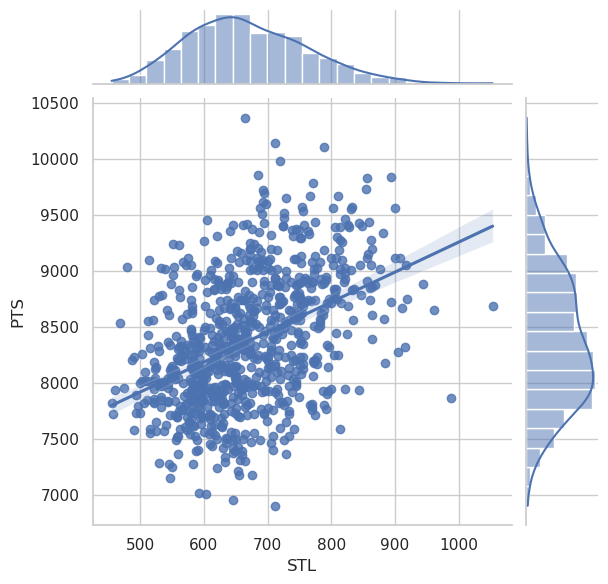

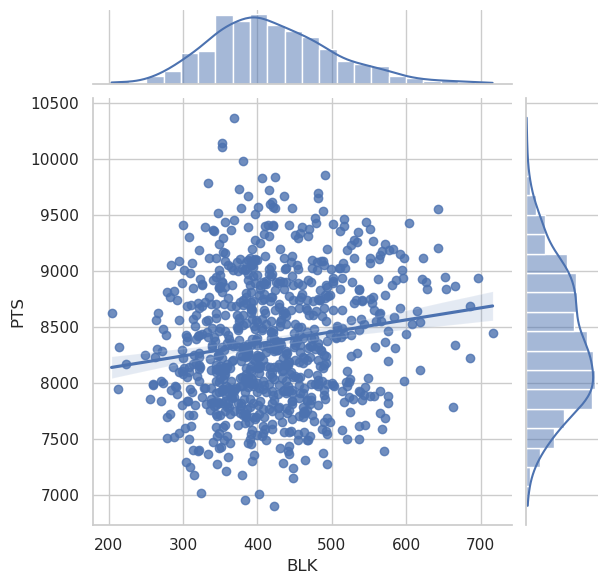

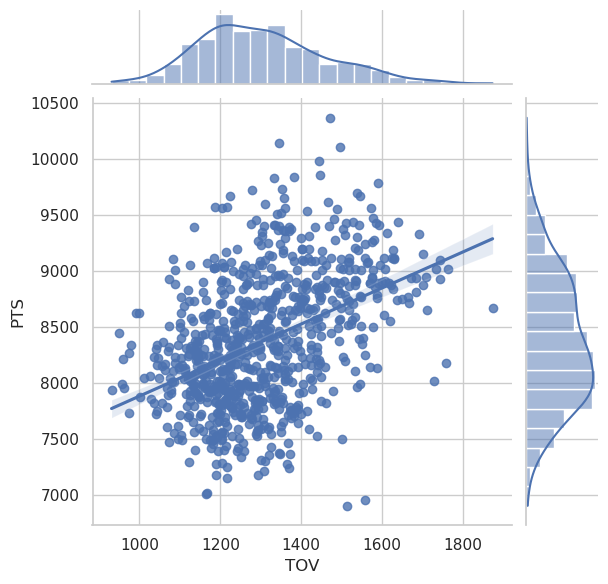

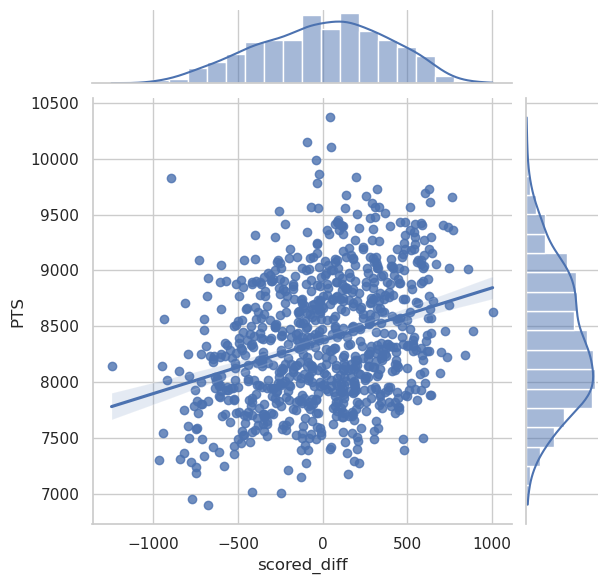

In [55]:
all_numeric_vars = list(df.select_dtypes(include='number').columns)
print(all_numeric_vars)

dependent_variable = 'PTS'
for col in all_numeric_vars:
    try:
        sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg");
    except:
        print('Could not plot variable %s' % col)

In [56]:
df[all_numeric_vars].corr().round(2)


,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,scored_diff
SeasonEnd,1.00,-0.06,-0.00,-0.64,-0.63,-0.76,-0.68,-0.87,-0.87,0.84,0.85,-0.51,-0.55,-0.70,0.27,-0.67,-0.50,-0.20,-0.72,-0.00
Playoffs,-0.06,1.00,0.80,0.27,-0.23,0.19,-0.01,0.11,-0.01,0.03,0.01,0.22,0.18,-0.04,0.34,0.31,0.17,0.19,-0.17,0.77
W,-0.00,0.80,1.00,0.30,-0.33,0.19,-0.07,0.07,-0.09,0.12,0.08,0.20,0.16,-0.10,0.47,0.32,0.12,0.20,-0.24,0.97
PTS,-0.64,0.27,0.30,1.00,0.79,0.94,0.79,0.83,0.71,-0.49,-0.52,0.70,0.66,0.50,0.09,0.76,0.43,0.15,0.43,0.31
oppPTS,-0.63,-0.23,-0.33,0.79,1.00,0.80,0.83,0.77,0.76,-0.56,-0.56,0.55,0.54,0.55,-0.21,0.54,0.34,0.03,0.58,-0.34
FG,-0.76,0.19,0.19,0.94,0.80,1.00,0.88,0.94,0.86,-0.67,-0.69,0.54,0.52,0.60,0.01,0.81,0.47,0.18,0.52,0.20
FGA,-0.68,-0.01,-0.07,0.79,0.83,0.88,1.00,0.84,0.86,-0.61,-0.61,0.39,0.38,0.74,-0.05,0.63,0.48,0.12,0.45,-0.07
2P,-0.87,0.11,0.07,0.83,0.77,0.94,0.84,1.00,0.97,-0.88,-0.89,0.57,0.57,0.68,-0.10,0.78,0.49,0.22,0.64,0.07
2PA,-0.87,-0.01,-0.09,0.71,0.76,0.86,0.86,0.97,1.00,-0.92,-0.92,0.52,0.52,0.77,-0.17,0.68,0.49,0.21,0.64,-0.09
3P,0.84,0.03,0.12,-0.49,-0.56,-0.67,-0.61,-0.88,-0.92,1.00,0.99,-0.51,-0.53,-0.67,0.23,-0.57,-0.42,-0.23,-0.68,0.12


In [57]:
all_numeric_vars = list(df.select_dtypes(include='number').columns)
all_numeric_vars.remove('PTS')
independent_variables = all_numeric_vars.copy()

print(independent_variables)
dependent_variable = 'PTS'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)
X
model_runs_scored = sm.OLS(y, X).fit()

print(model_runs_scored.summary())


y_pred = model_runs_scored.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', root_mean_squared_error.round(3))
try:
    print( 'RMSEs Percentage off average:', ((root_mean_squared_error / y.mean())*100).round(2))
except:
     pass

['SeasonEnd', 'Playoffs', 'W', 'oppPTS', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'scored_diff']
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.297e+25
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:32:26   Log-Likelihood:                 16239.
No. Observations:                 835   AIC:                        -3.244e+04
Df Residuals:                     818   BIC:                        -3.236e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|     

In [58]:
independent_variables = [ 'FG', '2P','3P']

print(independent_variables)

dependent_variable = 'PTS'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)
X
model_runs_scored = sm.OLS(y, X).fit()

print(model_runs_scored.summary())


y_pred = model_runs_scored.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', root_mean_squared_error.round(3))
try:
    print( 'RMSEs Percentage off average:', ((root_mean_squared_error / y.mean())*100).round(2))
except:
    pass

['FG', '2P', '3P']
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     4949.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:32:48   Log-Likelihood:                -5431.4
No. Observations:                 835   AIC:                         1.087e+04
Df Residuals:                     832   BIC:                         1.088e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        945.8623     92.684 

In [59]:
independent_variables = ['2PA', '3PA','FTA']

print(independent_variables)

dependent_variable = 'PTS'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)
X
model_runs_scored = sm.OLS(y, X).fit()

print(model_runs_scored.summary())


y_pred = model_runs_scored.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', root_mean_squared_error.round(3))
try:
    print( 'RMSEs Percentage off average:', ((root_mean_squared_error / y.mean())*100).round(2))
except:
    pass

['2PA', '3PA', 'FTA']
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1050.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          3.63e-282
Time:                        18:33:07   Log-Likelihood:                -5844.7
No. Observations:                 835   AIC:                         1.170e+04
Df Residuals:                     831   BIC:                         1.172e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1436.9955    230.0

In [60]:
model_runs_scored.resid.mean()


-2.025504607684955e-11

array([[<Axes: title={'center': 'FG'}>, <Axes: title={'center': '2P'}>],
       [<Axes: title={'center': '3P'}>, <Axes: >]], dtype=object)

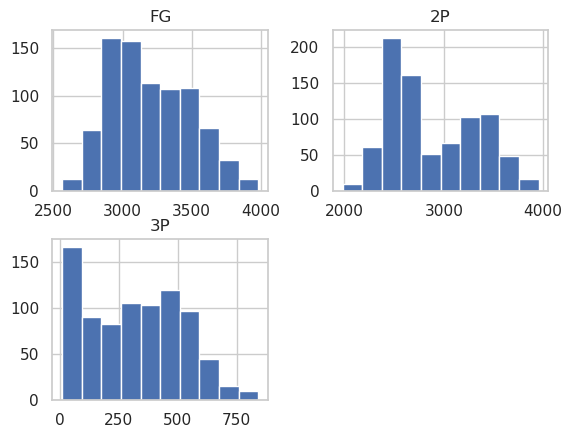

In [61]:
df[ ['FG', '2P','3P']].hist()


In [66]:
df.head(1)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,scored_diff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,...,75,2038,2645,1369,2406,1913,782,539,1495,239


In [63]:
X = df[['scored_diff']]
y = df['W']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr_wins = LinearRegression()

lr_wins.fit(X_train, y_train)

y_pred = lr_wins.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

mse_lr_wins = metrics.mean_squared_error(y_test, y_pred)

rmse_lr_wins = metrics.mean_squared_error(y_test, y_pred, squared=False)
np.sqrt(mse_lr_wins), rmse_lr_wins

R-Squared Score: 0.9439204678131711


(3.1438050703939804, 3.1438050703939804)

In [64]:
X = df[['2PA', '3PA','FTA']]
y = df['PTS']
print(y.mean()) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr_runs_scored = LinearRegression()

lr_runs_scored.fit(X_train, y_train)

y_pred = lr_runs_scored.predict(X_test)


r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

metrics.mean_squared_error(y_test, y_pred, squared=False)

8370.239520958085
R-Squared Score: 0.7653721224122424


294.764784972791

In [65]:
X = df[[ 'FG', '2P','3P']]
y = df['PTS']
print(y.mean()) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr_runs_scored = LinearRegression()

lr_runs_scored.fit(X_train, y_train)

y_pred = lr_runs_scored.predict(X_test)


r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

metrics.mean_squared_error(y_test, y_pred, squared=False)

8370.239520958085
R-Squared Score: 0.9177295428943337


156.68356440914192